In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import exists


In [ ]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})


# 1. Read Results

In [ ]:
data_names = ['adult', 'compas', 'give_me_some_credit', 'heloc']
model_names = ['ann', 'linear']
methods = ['cchvae', 'clue', 'cent', 'cruds', 'dice', 'growing_spheres', 'revisewachter', 'face', 'cem',]
method_names = [m + '_pytorch' if m in ['cchvae', 'clue', 'cruds', 'revisewachter'] else m + '_tensorflow' for m in methods]

In [ ]:
columns = ['data', 'method', 'model', 'y-Nearest-Neighbours', 'L0_distance', 'L1_distance', 'L2_distance',
       'Linf_distance', 'Success_Rate', 'Redundancy', 'Constraint_Violation',
       'timers', 'VAE-Euclidean-Distance']
results = pd.DataFrame(columns=columns)

In [ ]:
data_names

['adult', 'compas', 'give_me_some_credit', 'heloc']

In [ ]:
for data_name in data_names:
  for method_name in method_names:
    for model_name in model_names:
      data_path = 'outputs/'+data_name+'_August_14/bench_csvs/' + method_name + '_' + model_name + '_bench.csv'
      if method_name == 'cruds_pytorch' or method_name == 'face_tensorflow':
        data_path = 'outputs/'+data_name+'/bench_csvs/' + method_name + '_' + model_name + '_bench.csv'
      if method_name in ['growing_spheres_tensorflow', 'cem_tensorflow', 'cchvae_pytorch'] and data_name == 'give_me_some_credit':
        print('here')
        data_path = 'outputs/'+data_name+'/bench_csvs/' + method_name + '_' + model_name + '_bench.csv'

      if exists(data_path):
        data = pd.read_csv(data_path)

        for i, row in data.iterrows():
          row_dict = row.to_dict()
          row_dict['data'] = data_name 
          row_dict['method'] = method_name
          row_dict['model'] = model_name 
          if method_name == 'cruds_pytorch' or method_name == 'face_tensorflow':
            row_dict['timers'] = row_dict['avg_time']
          if method_name in ['growing_spheres_tensorflow', 'cem_tensorflow', 'cchvae_pytorch'] and data_name == 'credt':
            row_dict['timers'] = row_dict['avg_time']
          results = results.append(row_dict, ignore_index=True)
      else:
        print(data_path)

here
here
here
here
here
outputs/give_me_some_credit/bench_csvs/cem_tensorflow_ann_bench.csv
here
outputs/give_me_some_credit/bench_csvs/cem_tensorflow_linear_bench.csv
outputs/heloc/bench_csvs/face_tensorflow_ann_bench.csv
outputs/heloc/bench_csvs/face_tensorflow_linear_bench.csv


In [ ]:
results.shape

(10302, 14)

In [ ]:
results['method'].unique()

array(['cchvae_pytorch', 'clue_pytorch', 'cote_tensorflow',
       'cruds_pytorch', 'dice_tensorflow', 'growing_spheres_tensorflow',
       'revisewachter_pytorch', 'face_tensorflow', 'cem_tensorflow'],
      dtype=object)

In [ ]:
results = results[results['method'] != 'revisewachter_pytorch']
results.shape

(8702, 14)

In [ ]:
results['method'].replace(
    {
        'cchvae_pytorch': 'CCH-VAE',
        'clue_pytorch': 'CLUE',
        'cent_tensorflow': 'CEnt',
        'cruds_pytorch': 'CRUDS',
        'dice_tensorflow': 'DiCE',
        'growing_spheres_tensorflow': 'GS',
        'revisewachter_pytorch': 'Wachter', 
        'face_tensorflow': 'FACE', 
        'cem_tensorflow': 'CEM'
    }
    ,inplace=True
)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
results['data'].replace(
    {
        'adult': 'Adult',
        'compas': 'COMPAS',
        'give_me_some_credit': 'Credit',
        'heloc': 'HELOC',
    }
    ,inplace=True
)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
results.rename(columns={'L0_distance': 'l0-distance', 'L2_distance': 'l2-distance', 'VAE-Euclidean-Distance': 'VAE-distance'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
results.columns

Index(['data', 'method', 'model', 'y-Nearest-Neighbours', 'l0-distance',
       'L1_distance', 'l2-distance', 'Linf_distance', 'Success_Rate',
       'Redundancy', 'Constraint_Violation', 'timers', 'VAE-distance',
       'avg_time'],
      dtype='object')

In [ ]:
results['method'].unique()

array(['CCH-VAE', 'CLUE', 'CEnt', 'CRUDS', 'DiCE', 'GS', 'FACE', 'CEM'],
      dtype=object)

In [ ]:
results['method'] = results['method'].astype('category')

my_order = ["CCH-VAE", "CEM", "GS", 'CLUE', 'FACE',"DiCE", "CRUDS", "CEnt"]
results['method'].cat.reorder_categories(my_order, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  after removing the cwd from sys.path.


In [ ]:
results['data'].unique()

array(['Adult', 'COMPAS', 'Credit', 'HELOC'], dtype=object)

#1. Proximity

In [ ]:
palette = 'mako_r'
sns.set(font_scale = 2)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})


In [ ]:
rows = results['data'].unique()
columns = ['l0-distance', 'l2-distance', 'VAE-distance', 'Redundancy']


In [ ]:
# sns.set(font_scale = 1)


In [ ]:
model_name = model_names[1]
fig, axes = plt.subplots(len(rows), len(columns),sharex=False,sharey=True, figsize=(15,13))
for i in range(len(rows)):
  for j in range(len(columns)):
    sns.violinplot(x=columns[j], y="method",
                        data=results[(results.data == rows[i]) & (results.model == model_name)],
                        cut=0, scale="width", palette=palette, ax = axes[i][j], inner='quartile')
    axes[i][j].set(ylabel=None) 

for i in range(len(rows)):
  axes[i][0].set_ylabel(rows[i])

plt.savefig('vis_output/proximity_' + model_name + '.eps', format='eps', dpi=1200,bbox_inches='tight')


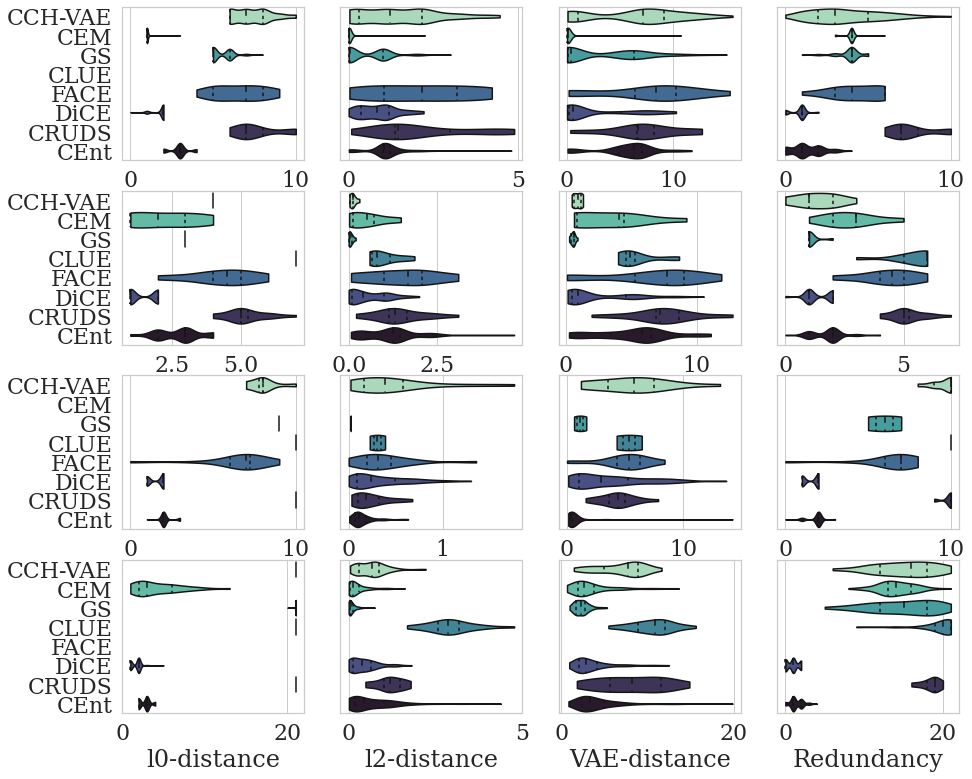

In [ ]:
model_name = model_names[0]
fig, axes = plt.subplots(len(rows), len(columns),sharex=False,sharey=True, figsize=(15,13))
for i in range(len(rows)):
  for j in range(len(columns)):
    sns.violinplot(x=columns[j], y="method",
                        data=results[(results.data == rows[i]) & (results.model == model_name)],
                        cut=0, scale="width", palette=palette, ax = axes[i][j], inner='quartile')
    axes[i][j].set(ylabel=None) 

# for i in range(len(rows)):
#   axes[i][0].set_ylabel(rows[i])

plt.savefig('vis_output/proximity_' + model_name + '.eps', format='eps', dpi=1200,bbox_inches='tight')


In [ ]:
results

,data,method,model,y-Nearest-Neighbours,l0-distance,L1_distance,l2-distance,Linf_distance,Success_Rate,Redundancy,Constraint_Violation,timers,VAE-distance,avg_time
0,Adult,CCH-VAE,ann,0.082796,7.0,2.242738,1.374588,1.000000,0.93,3.0,1.0,0.091619,6.614419,NaN
1,Adult,CCH-VAE,ann,NaN,9.0,3.989313,3.228207,1.000000,NaN,7.0,2.0,0.092735,14.706592,NaN
2,Adult,CCH-VAE,ann,NaN,7.0,1.560162,1.080580,1.000000,NaN,1.0,1.0,0.092153,6.402425,NaN
3,Adult,CCH-VAE,ann,NaN,8.0,2.732689,2.155499,1.000000,NaN,5.0,1.0,0.097839,10.634953,NaN
4,Adult,CCH-VAE,ann,NaN,7.0,1.458061,1.047102,1.000000,NaN,4.0,1.0,0.096181,6.397797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,HELOC,CEM,linear,NaN,3.0,0.231788,0.022255,0.130778,NaN,14.0,0.0,0.016422,1.644054,NaN
10196,HELOC,CEM,linear,NaN,1.0,0.126410,0.015979,0.126410,NaN,0.0,0.0,0.075110,1.593255,NaN
10197,HELOC,CEM,linear,NaN,3.0,0.302286,0.042932,0.191204,NaN,13.0,0.0,0.087164,1.664496,NaN
10198,HELOC,CEM,linear,NaN,7.0,1.346661,0.555869,0.600000,NaN,0.0,0.0,0.101173,6.331794,NaN


# Distance

In [ ]:
results_ANN = results[results.model == 'ann']

In [ ]:
# import plotly.graph_objects as go

# categories = ['l0','l1','l2', 'Linf', 'VAE']
# methods = results.method.unique()

# fig = go.Figure()

# for method in methods:
#   fig.add_trace(go.Scatterpolar(
#         r=results_ANN[results_ANN.method == method][['l0-distance', 'L1_distance', 'l2-distance', 'Linf_distance', 'VAE-distance']].mean(),
#         theta=categories,
#         # fill='toself',
#         name=method,
#   ))


# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       # range=[0, 5]
#     )),
#   showlegend=True
# )

# fig.show()

In [ ]:
# distances = ['l0-distance', 'L1_distance', 'l2-distance', 'Linf_distance']
# fig, axes = plt.subplots(2, 2,sharex=False,sharey=True, figsize=(8,8))

# sns.set(font_scale=1)
# sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

# for i in range(2):
#   for j in range(2):
#     if i==1 and j==1:
#       sns.scatterplot(x=distances[i*2+j], y="VAE-distance", hue="method", style='method', #size="weight", sizes=(40, 400), 
#             alpha=.8, palette="mako_r", data=results_ANN[results.data=='Adult'], ax=axes[i][j], legend=True,s=100)
#     else :
#       sns.scatterplot(x=distances[i*2+j], y="VAE-distance", hue="method", style='method', #size="weight", sizes=(40, 400), 
#             alpha=.8, palette="mako_r", data=results_ANN[results.data=='Adult'], ax=axes[i][j], legend=False,s=100)
# # plt.legend()
# plt.legend(bbox_to_anchor=(1.01, 1.5),
#            borderaxespad=0)
# plt.savefig('vis_output/distances_4.eps', format='eps', dpi=1200,bbox_inches='tight')


In [ ]:
# distances = ['l0-distance', 'l2-distance']
# fig, axes = plt.subplots(1, 2,sharex=False,sharey=True, figsize=(8,3))

# sns.set(font_scale=1)
# sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

# for i in range(2):
#     if i==1:
#       sns.scatterplot(x=distances[i], y="VAE-distance", hue="method", style='method', #size="weight", sizes=(40, 400), 
#             alpha=.8, palette="mako_r", data=results_ANN[results.data=='Adult'], ax=axes[i], legend=True,s=100)
#     else :
#       sns.scatterplot(x=distances[i], y="VAE-distance", hue="method", style='method', #size="weight", sizes=(40, 400), 
#             alpha=.8, palette="mako_r", data=results_ANN[results.data=='Adult'], ax=axes[i], legend=False,s=100)
# # plt.legend()
# plt.legend(bbox_to_anchor=(1.01, 1),
#            borderaxespad=0)
# plt.savefig('vis_output/distances.eps', format='eps', dpi=1200,bbox_inches='tight')


# 2. Other Metrics

In [ ]:
results_avg = pd.DataFrame(columns=['data', 'method', 'model', 'yNN', 'Flip rate', 'Violations', 'Time'])
for data in results['data'].unique():
  for method in results['method'].unique():
    for model in results['model'].unique():
      avg = results[(results.data == data) & (results.method == method) & (results.model == model)].mean()
      results_avg = results_avg.append( {
          'data': data, 
          'model': model, 
          'method': method, 
          'yNN': avg['y-Nearest-Neighbours'],
          'Flip rate': avg['Success_Rate'], 
          'Violations': avg['Constraint_Violation'], 
          'Time': avg['timers']

      }, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [ ]:
results_avg['method'] = results_avg['method'].astype('category') 
results_avg['method'].cat.reorder_categories(my_order, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  


In [ ]:
results_avg['model'].replace({
    'ann': 'ANN',
    'linear': 'LR'
},inplace=True)

In [ ]:
results_avg_adult = results_avg[results_avg.data == 'adult']

In [ ]:
method_dict = {
    'cchvae_pytorch': 'CCH-VAE',
    'clue_pytorch': 'CLUE', 
    'cruds_pytorch': 'CRUDS',
    'face_tensorflow': 'FACE',
    'dice_tensorflow': 'DiCE', 
    'growing_spheres_tensorflow' : 'GS'
}
model_dict = {
    'linear': 'LR', 
    'ann': 'ANN'
}
data_dict = {
    'compas': 'COMPAS',
    'adult': 'Adult', 
    'give_me_some_credit': 'Credit', 
    'heloc': 'HELOC'
}

In [ ]:
semi_immutability_violations = {method : 0 for method in method_names}
results_avg['Semi-immutability Violations'] = 0
for data_name in ['adult', 'compas', 'give_me_some_credit']:
  for method_name in method_names:
    if method_name == 'revisewachter_pytorch':
      continue
    for model_name in model_names:
      data_path_f = 'outputs/'+data_name+'/bench_csvs/' + method_name + '_' + model_name + '_factuals.csv'
      data_path_cf = 'outputs/'+data_name+'/bench_csvs/' + method_name + '_' + model_name + '_counterfactuals.csv'

      if exists(data_path_f):
        data_f = pd.read_csv(data_path_f)
        data_cf = pd.read_csv(data_path_cf)
        for i, row in data_f.iterrows():
          age_diff = data_cf.loc[i,'age'] - data_f.loc[i,'age']
          if age_diff < 0:
            results_avg.loc[(results_avg.data == data_dict[data_name]) & (results_avg.method == method_dict[method_name]) & (results_avg.model == model_dict[model_name]), 'Semi-immutability Violations'] += 1/ data_f.shape[0]


In [ ]:
sns.set(font_scale=1.2)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})


In [ ]:
columns = ['Semi-immutability Violations', 'Violations', 'Flip rate', 'Time','yNN']
columns2 = [r'Semi-imm. Viol. ($\downarrow$)',r'Imm. Viol. ($\downarrow$)', r'Flip rate ($\uparrow$)', r'Time ($\downarrow$)', r'yNN ($\uparrow$)']

rows = results_avg['model'].unique()

model_name = model_names[0]
fig, axes = plt.subplots(len(rows), len(columns),sharex=True,sharey=False, figsize=(20,3.5))
for i in range(len(rows)):
  for j in range(len(columns)):
    if j == 3:
      sns.barplot(x='method', y=columns[j],
                        data=results_avg[(results_avg.model == rows[i]) & (results_avg.data == 'Adult')],
                         palette=palette, ax = axes[i][j],log=True)
    else:
      sns.barplot(x='method', y=columns[j],
                        data=results_avg[(results_avg.model == rows[i]) & (results_avg.data == 'Adult')],
                         palette=palette, ax = axes[i][j],)
    axes[i][j].set(ylabel=None) 
    axes[i][j].set(xlabel=None)
    axes[0][j].set_title(columns2[j])
    
for i in range(len(rows)):
  axes[i][0].set_ylabel(rows[i])

for i in range(len(rows)):
  for j in range(len(columns)):
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation = 45, horizontalalignment='right')


plt.savefig('vis_output/metrics_adult.eps', format='eps', dpi=1200,bbox_inches='tight')


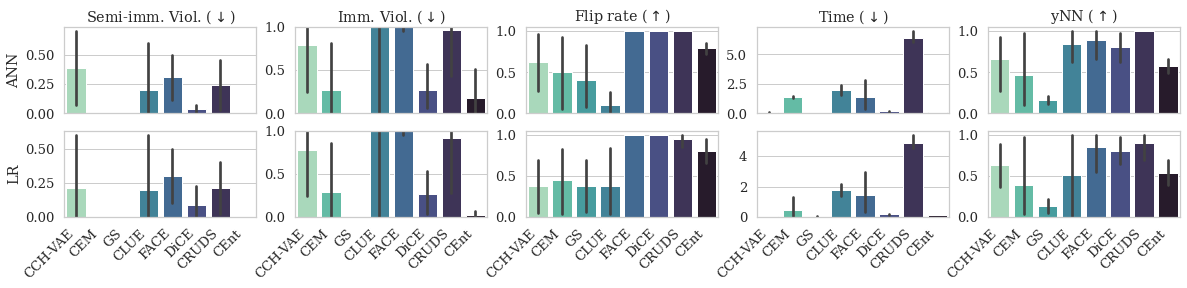

In [ ]:
columns = ['Semi-immutability Violations', 'Violations', 'Flip rate', 'Time','yNN']
columns2 = [r'Semi-imm. Viol. ($\downarrow$)',r'Imm. Viol. ($\downarrow$)', r'Flip rate ($\uparrow$)', r'Time ($\downarrow$)', r'yNN ($\uparrow$)']

rows = results_avg['model'].unique()

model_name = model_names[0]
fig, axes = plt.subplots(len(rows), len(columns),sharex=True,sharey=False, figsize=(20,3.5))
for i in range(len(rows)):
  for j in range(len(columns)):
    if j == 3:
      sns.barplot(x='method', y=columns[j],
                        data=results_avg[results_avg.model == rows[i]],
                         palette=palette, ax = axes[i][j],log=False)
    else: 
      sns.barplot(x='method', y=columns[j],
                        data=results_avg[results_avg.model == rows[i]],
                         palette=palette, ax = axes[i][j])

    axes[i][j].set(ylabel=None) 
    axes[i][j].set(xlabel=None)
    axes[0][j].set_title(columns2[j])
    
for i in range(len(rows)):
  axes[i][0].set_ylabel(rows[i])

for i in range(len(rows)):
  for j in range(len(columns)):
    if j == 1: # imm 
      axes[i][j].set(ylim=(0, 1))

    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(),rotation = 45, horizontalalignment='right')


plt.savefig('vis_output/metrics.eps', format='eps', dpi=1200,bbox_inches='tight')


## Accuracy

In [ ]:
for data_name in data_names:
  for model_name in model_names:
    data_path = 'outputs/'+data_name+'_August_14/bench_csvs/cent_tensorflow_' + model_name + '_DTScores.csv'
    if exists(data_path):
      print(data_name, model_name, pd.read_csv(data_path)['Test'].mean())

adult ann 0.944
adult linear 0.9566499999999999
compas ann 0.96465
compas linear 0.9778500000000001
give_me_some_credit ann 0.9916500000000003
give_me_some_credit linear 0.9873500000000002
heloc ann 0.873
heloc linear 0.89425
